In [ ]:
#librerias requeridas (NO BORRAR)
!pip install plotly nbformat ipython jupyterlab_widgets --upgrad

#librerias (NO BORRAR)
import pandas as pd
import plotly.express as px
import plotly.io as pio


**Gráfico 2**

**HORAS DIARIAS POR PAÍS**

In [4]:
import pandas as pd
import plotly.express as px
import os

# Datos
data = {
    "Country": [
        "Brazil", "Nigeria", "Philippines", "South Africa", "Chile", "Kenya", "Columbia",
        "Ghana", "Indonesia", "México", "Argentina", "Turkey", "Malaysia", "Saudi Arabia",
        "UAE", "Egypt", "Bulgaria", "Thailand", "India", "Portugal", "Global", "Romania",
        "Russia", "Vietnam", "Morocco", "USA", "Singapore", "Israel", "China", "New Zealand",
        "Ireland", "Greece", "Hong Kong", "Canada", "Australia", "Norway", "Taiwan", "Poland",
        "Spain", "Sweden", "Denmark", "Czechia", "France", "UK", "Italy", "Hungary",
        "Switzerland", "Germany", "Netherlands", "Belgium", "South Korea", "Japan"
    ],
    "Hours": [
        3.49, 3.44, 3.38, 3.34, 3.34, 3.32, 3.29, 3.2, 3.14, 3.1, 3.08, 2.56, 2.52, 2.5,
        2.44, 2.4, 2.38, 2.35, 2.29, 2.28, 2.26, 2.26, 2.22, 2.17, 2.16, 2.16, 2.11, 2.11,
        2.04, 2.04, 1.59, 1.59, 1.55, 1.55, 1.53, 1.53, 1.53, 1.52, 1.52, 1.52, 1.49, 1.47,
        1.46, 1.46, 1.43, 1.39, 1.36, 1.33, 1.31, 1.3, 1.11, 0.47
    ]
}

df = pd.DataFrame(data)
fig = px.treemap(
    df,
    path=['Country'],
    values='Hours',
    color='Hours',
    color_continuous_scale='YlOrRd',
    title='Horas diarias en redes sociales por país (2024)',
    hover_data={'Hours': ':.2f'},
    labels={'Hours': 'Horas/día'},
    width=1000,
    height=700
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    font=dict(size=12),
    coloraxis_colorbar=dict(title='Horas/día', thickness=20)
)

fig.update_traces(
    textinfo='label+value',
    texttemplate='%{label}<br>%{value:.2f}h',
    hovertemplate='<b>%{label}</b><br>Horas: %{value:.2f}'
)
fig.show()

if not os.path.exists('images'):
    os.makedirs('images')  

fig.write_image("images/graph1_JG.png", scale=2,format='png')  


Datos obtenidos de:
*Statista. "Promedio de minutos diarios de uso de redes sociales por los internautas en países seleccionados en el tercer trimestre de 2023." Statista, 31 de enero de 2024, https://www.statista.com/statistics/270229/usage-duration-of-social-networks-by-country/.​*



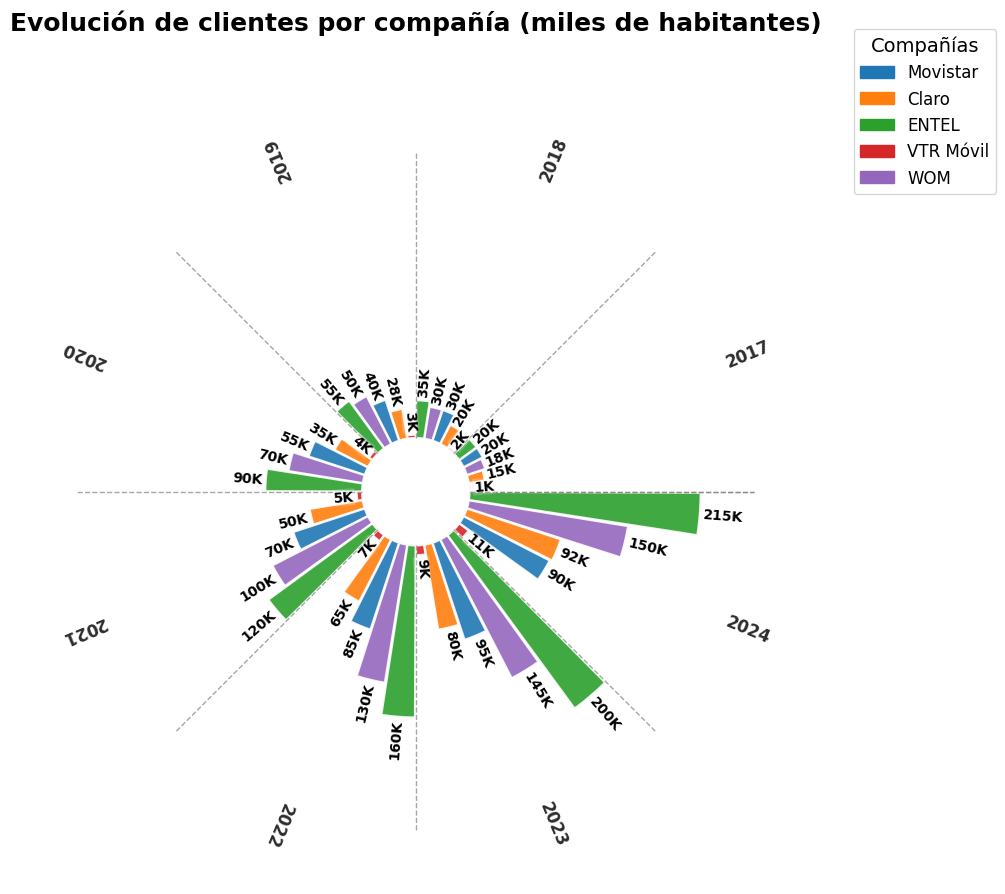

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Año': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Movistar': [20, 30, 40, 55, 70, 85, 95, 90],
    'Claro': [15, 20, 28, 35, 50, 65, 80, 92],
    'ENTEL': [20, 35, 55, 90, 120, 160, 200, 215],
    'VTR Móvil': [1, 2, 3, 4, 5, 7, 9, 11],
    'WOM': [18, 30, 50, 70, 100, 130, 145, 150]
}
colores = {
    'Movistar': '#1f77b4',
    'Claro': '#ff7f0e',
    'ENTEL': '#2ca02c',
    'VTR Móvil': '#d62728',
    'WOM': '#9467bd'
}
radio_inicial = 50
years = data['Año']
companias = [key for key in data.keys() if key != 'Año']
num_years = len(years)
num_companias = len(companias)
angulo_por_year = 2 * np.pi / num_years
ancho_barra = angulo_por_year / num_companias * 0.95
angulos = []
valores = []
colores_barras = []
for i, year in enumerate(years):
    angulo_base = i * angulo_por_year
    
    companias_ordenadas = sorted(companias, key=lambda x: data[x][i])
    
    for j, compania in enumerate(companias_ordenadas):
        angulo = angulo_base + (j + 0.5) * (angulo_por_year / num_companias)
        valor = data[compania][i]
        
        angulos.append(angulo)
        valores.append(valor)
        colores_barras.append(colores[compania])

plt.figure(figsize=(10, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
barras = ax.bar(
    x=angulos,
    height=valores,
    width=ancho_barra,
    bottom=radio_inicial,  
    color=colores_barras,
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)
for i in range(num_years + 1):
    angulo_divisor = i * angulo_por_year
    ax.plot([angulo_divisor, angulo_divisor], 
            [radio_inicial, radio_inicial + max(valores) + 50],  
            color='gray', linestyle='--', linewidth=1, alpha=0.7)
max_height = radio_inicial + max(valores) + 70
for i, year in enumerate(years):
    angulo = i * angulo_por_year + angulo_por_year / 2
    ax.text(
        angulo, max_height, str(year),
        ha='center', va='center',
        rotation=np.degrees(angulo),
        rotation_mode='anchor',
        fontsize=12,
        fontweight='bold',
        color='#2d2d2d'
    )
for bar, angulo, valor in zip(barras, angulos, valores):
    rotation = np.degrees(angulo)
    alignment = "right" if (angulo >= np.pi/2 and angulo < 3*np.pi/2) else "left"
    rotation = rotation + 180 if alignment == "right" else rotation
    y_position = radio_inicial + (bar.get_height()/2)
    if valor < 300:
        y_position = radio_inicial + bar.get_height() +3  
        text_color = 'black'
        bbox_props = dict(boxstyle="round,pad=0.1", facecolor='white', edgecolor='none', alpha=0.2)
    else:
        text_color = 'white'
        bbox_props = None
    ax.text(
        x=angulo,
        y=y_position,
        s=f"{valor}K",
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode='anchor',
        color=text_color,
        fontsize=10,
        fontweight='bold',
        bbox=bbox_props
    )
ax.set_ylim(0, radio_inicial + max(valores) + 100)
leyenda = [plt.Rectangle((0,0),1,1, color=colores[compania]) for compania in companias]
ax.legend(
    leyenda,
    companias,
    loc='upper right',
    bbox_to_anchor=(1.25, 1.1),
    title='Compañías',
    title_fontsize=14,
    fontsize=12
)

plt.title('Evolución de clientes por compañía (miles de habitantes)', 
         pad=50, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig(
    "images/graph2_JG.png", 
    dpi=200,                 
    bbox_inches='tight',     
    transparent=False        
)

plt.show()